In [ ]:
pip install pandas


In [ ]:
pip install pydotplus

In [ ]:
pip install matplotlib

In [ ]:
pip install numpy

In [ ]:
pip install graphviz

In [ ]:
pip install sklearn

In [ ]:
pip install xlrd

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import sklearn
from IPython.display import Image  
import pydotplus
import matplotlib
pd.set_option('display.max_rows', 500)


Andiamo a importare i dati, utilizzando questo metodo per specificare il percorso. Nella funzione read_excel possiamo andare a specificare il missing value, che verrà tradotto con un NaN.

I dati devono quindi essere convertiti in un dataframe.

In [2]:

data = pd.read_excel(r'C:\Users\giuli\Documents\GitHub\Business_Intelligence_ES4_DecisionTree\Users.xls', na_values='?')
df = pd.DataFrame(data)
df[df['Workclass'].isna()]

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,Native Country,Response
27,54,NaN,Some-college,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,South,Positive
61,32,NaN,7th-8th,Married-spouse-absent,NaN,Not-in-family,White,Male,NaN,Negative
69,25,NaN,Some-college,Never-married,NaN,Own-child,White,Male,United-States,Negative
77,67,NaN,10th,Married-civ-spouse,NaN,Husband,White,Male,United-States,Negative
106,17,NaN,10th,Never-married,NaN,Own-child,White,Female,United-States,Negative
128,35,NaN,HS-grad,Married-civ-spouse,NaN,Husband,White,Male,United-States,Negative
149,43,NaN,Some-college,Divorced,NaN,Not-in-family,White,Female,United-States,Negative
154,52,NaN,HS-grad,Divorced,NaN,Not-in-family,White,Male,United-States,Positive
160,68,NaN,1st-4th,Divorced,NaN,Not-in-family,White,Female,United-States,Negative
187,53,NaN,Bachelors,Divorced,NaN,Not-in-family,White,Female,United-States,Negative


Andiamo a sostituire i dati mancanti con i dati della colonna più frequenti (ossia la moda). l'output di df.mode ha due righe perché nella colonna 'Age' sono presenti due mode. 

In [3]:
df.mode()

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,Native Country,Response
0,31,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,Negative
1,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


andiamo a fillare tutti gli NaN con la moda della rispettiva colonna

In [4]:
df = df.fillna(df.mode().iloc[0])
df[df['Workclass'].isna()]
df.dtypes
df_enc = df

for col in df_enc.columns:
    df_enc[col]=df_enc[col].astype('category')
    df_enc[col]=df_enc[col].cat.codes

df_enc['Age']=df_enc['Age'].astype('int64')

df_enc

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,Native Country,Response
0,22,5,9,4,0,1,4,1,27,0
1,33,4,9,2,3,0,4,1,27,0
2,21,2,11,0,5,1,4,1,27,0
3,36,2,1,2,5,0,2,1,27,0
4,11,2,9,2,9,5,2,0,4,0
...,...,...,...,...,...,...,...,...,...,...
995,39,2,11,2,3,0,4,1,27,1
996,28,2,12,0,9,1,4,1,27,0
997,31,0,9,0,3,4,4,1,27,1
998,23,2,15,2,6,0,4,1,27,0


In [5]:
dfX= df_enc.iloc[:, 0:9]
dfY = df_enc.iloc[:, 9]

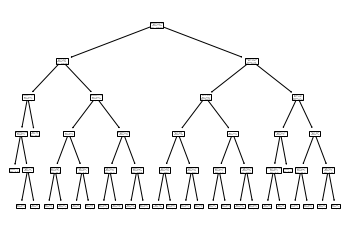

In [6]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(dfX, dfY)
tree.plot_tree(clf, feature_names=df_enc.columns)
matplotlib.pyplot.show()


In [7]:
data_topredict = pd.read_excel(r'C:\Users\giuli\Documents\GitHub\Business_Intelligence_ES4_DecisionTree\Prospects.xls', na_values='?')
df_toPredict= pd.DataFrame(data_topredict)

In [8]:
df_toPredict.head()

,Age,Workclass,Education,Marital Status,Occupation,Relationship,Race,Sex,Native Country
0,25,Private,HS-grad,Never-married,Farming-fishing,Unmarried,White,Male,NaN
1,46,Private,9th,Married-civ-spouse,Other-service,Husband,White,Male,United-States
2,37,Private,1st-4th,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,Cambodia
3,41,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
4,44,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [9]:
for col in df_toPredict.columns:
    df_toPredict[col] = df_toPredict[col].astype('category')
    df_toPredict[col] = df_toPredict[col].cat.codes

df_toPredict['Age'] = df_toPredict['Age'].astype('int64')

In [10]:
predictions = clf.predict(df_toPredict)

In [11]:
predictions[33]

1

In [12]:
clf.score(dfX, dfY)

0.836

Provo a fare un k-fold cross validation. Uso la classe StratifieKFold per creare l'oggetto folds. Questo mi permetterà di stratificare il dataset.

In [13]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits = 20)

ho creato l'oggetto folds che mi permette di stratificare il dataset. Una volta splittato con il metodo split avro degli indici (degli iteratori) che vanno usati all'interno del ciclo for per selezionare il dataset di train e quello di test, esattamente come nel codice sotto

In [14]:
splits =folds.split(dfX, dfY)
clf_k = tree.DecisionTreeClassifier(max_depth=20)
score = []
for train_index, test_index in splits:
    
    kX = dfX.iloc[train_index, :]
    kY = dfY[train_index]
    
    clf_k = clf_k.fit(kX, kY)
    
    k_test_X = dfX.iloc[test_index, :]
    k_test_Y = dfY.iloc[test_index]
    score.append(clf_k.score(k_test_X, k_test_Y))
    
print(score)


[0.78, 0.66, 0.78, 0.7, 0.74, 0.78, 0.8, 0.84, 0.78, 0.84, 0.9, 0.82, 0.82, 0.78, 0.88, 0.8, 0.78, 0.86, 0.82, 0.74]


Tuttavia posso fare la stessa identica cosa con il metodo cross_val_score. Basta che gli passo il costruttore del modello che voglio testare, i dati e i responsi. Il numero di k folds fissato è 5 ma può variare

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
cross_val_score(tree.DecisionTreeClassifier(max_depth = 7), dfX, dfY).mean()

0.759

andiamo a vedere come varia la precisione del decision tree classifier al variare della sua profondità massima:

In [61]:
scores = []
for i in range(1,50,1):
    s=cross_val_score(tree.DecisionTreeClassifier(max_depth=i), dfX, dfY, cv=100)
    scores.append(s.mean())

In [18]:
import matplotlib.pyplot as plt

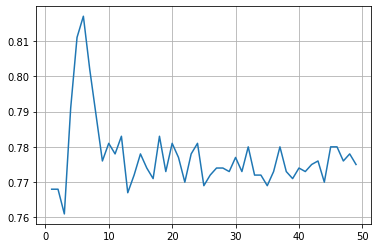

In [62]:
fig, ax = plt.subplots()
ax.plot(range(1,50,1), scores)
ax.grid()

Immaginiamo di scegliere un max depth = 15. andiamo ad analizzare la confusion matrix di questo test:


In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

Vado a splittare nuovamente in train e test, questa volta con la classe train_test_split. utilizzata esattamente in questo modo

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.3)


Vado quindi a fare un nuovo train e un predict. poi confronto i valori predetti con quelli veri contenuti in Y_test

In [60]:
final_tree = tree.DecisionTreeClassifier(max_depth=7)
final_tree.fit(X_train, Y_train)
Y_pred = final_tree.predict(X_test)

confusion_matrix(Y_test, Y_pred)

array([[197,  33],
       [ 35,  35]], dtype=int64)

Come si può notare la performance sui positivi non è molto buona. Andiamo quindi a provare con la random forest.

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc = RandomForestClassifier()
rfc.fit(dfX, dfY)

RandomForestClassifier()

In [35]:
pred_rfc = rfc.predict(df_toPredict)

In [43]:
pred_rfc[29]

1

Andiamo ad effettuare la k-fold cross validation come abbiamo fatto prima

In [44]:
score_rfc = cross_val_score(RandomForestClassifier(), dfX, dfY, cv=100)

In [46]:
score_rfc.mean()

0.804

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size = 0.2)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[143,  13],
       [ 19,  25]], dtype=int64)

mica tanto meglio... provo a fare una piccola analisi sulla profondità degli alberi


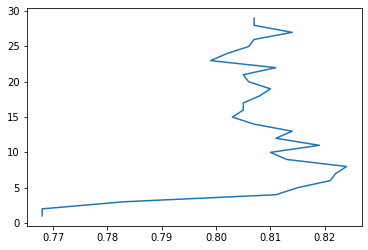

In [53]:
score_rfc_vec = []
for i in range(1, 30, 1):
    s=cross_val_score(RandomForestClassifier(max_depth=i), dfX, dfY, cv=50).mean()
    score_rfc_vec.append(s)



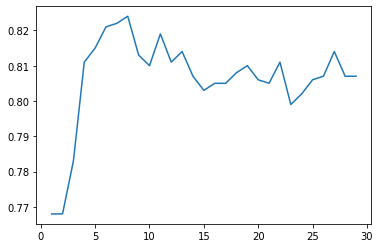

In [54]:
figure, ax = plt.subplots()
ax.plot(range(1,30,1), score_rfc_vec)

Riprovo con una max depth = 7

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, train_size = 0.2)
rfc_7 = RandomForestClassifier(max_depth=7)
rfc_7.fit(X_train, Y_train)
Y_pred = rfc_7.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[577,  37],
       [128,  58]], dtype=int64)